In [15]:
import numpy as np
import pandas as pd

In [16]:
data = pd.read_csv("/content/Fertilizer Prediction.csv")
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [17]:
data['Fertilizer Name'].values

array(['Urea', 'DAP', '14-35-14', '28-28', 'Urea', '17-17-17', '20-20',
       'Urea', '28-28', '14-35-14', 'DAP', '17-17-17', 'Urea', '28-28',
       'DAP', '17-17-17', 'Urea', '28-28', 'Urea', 'DAP', '20-20',
       '17-17-17', 'DAP', 'Urea', '20-20', '28-28', '14-35-14', 'Urea',
       'DAP', '20-20', '28-28', 'DAP', 'Urea', '14-35-14', '28-28',
       'Urea', '14-35-14', 'DAP', '17-17-17', 'DAP', '20-20', '14-35-14',
       '28-28', 'Urea', 'DAP', '14-35-14', '20-20', '28-28', 'Urea',
       '14-35-14', '28-28', '20-20', 'Urea', 'DAP', '17-17-17', '28-28',
       'Urea', '20-20', '17-17-17', 'DAP', 'Urea', '20-20', '28-28',
       '10-26-26', 'Urea', 'DAP', '20-20', '14-35-14', '10-26-26',
       '20-20', '28-28', 'Urea', '28-28', 'Urea', 'DAP', '14-35-14',
       '28-28', '20-20', '10-26-26', 'DAP', '14-35-14', 'Urea', 'DAP',
       '20-20', '28-28', '14-35-14', '10-26-26', 'Urea', '10-26-26',
       'DAP', '14-35-14', '10-26-26', 'Urea', '14-35-14', '28-28',
       '10-26-26', 'U

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [19]:
data.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [20]:
soil_type_label_encoder = LabelEncoder()
data["Soil Type"] = soil_type_label_encoder.fit_transform(data["Soil Type"])

In [21]:
crop_type_label_encoder = LabelEncoder()
data["Crop Type"] = crop_type_label_encoder.fit_transform(data["Crop Type"])

In [22]:
croptype_dict = {}
for i in range(len(data["Crop Type"].unique())):
    croptype_dict[i] = crop_type_label_encoder.inverse_transform([i])[0]
print(croptype_dict)

soiltype_dict = {}
for i in range(len(data["Soil Type"].unique())):
    soiltype_dict[i] = soil_type_label_encoder.inverse_transform([i])[0]
print(soiltype_dict)

{0: 'Barley', 1: 'Cotton', 2: 'Ground Nuts', 3: 'Maize', 4: 'Millets', 5: 'Oil seeds', 6: 'Paddy', 7: 'Pulses', 8: 'Sugarcane', 9: 'Tobacco', 10: 'Wheat'}
{0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'}


In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
fertname_label_encoder = LabelEncoder()
data["Fertilizer Name"] = fertname_label_encoder.fit_transform(data["Fertilizer Name"])

In [24]:
fertname_dict = {}
for i in range(len(data["Fertilizer Name"].unique())):
    fertname_dict[i] = fertname_label_encoder.inverse_transform([i])[0]
print(fertname_dict)

{0: '10-26-26', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}


In [25]:
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


In [27]:
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [38]:
X.shape

(99, 8)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((79, 8), (20, 8), (79,), (20,))

In [29]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train_trf = scale.fit_transform(x_train)
x_test_trf = scale.fit_transform(x_test)

RF :- 0.85
ET :- 0.9
BAG :- 0.8
ADA :- 0.6
GBC :- 0.9
VOTING :- 0.9


<BarContainer object of 6 artists>

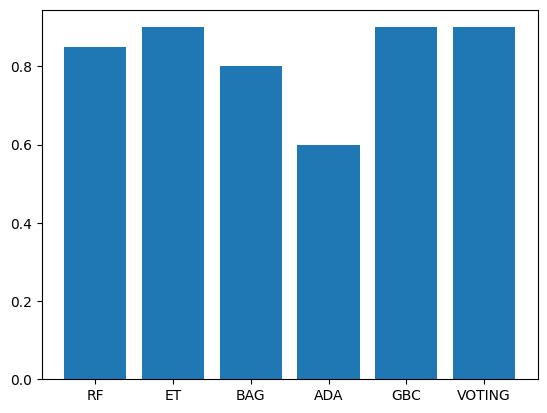

In [43]:
# bagging
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier
clf1=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5)
clf2=ExtraTreesClassifier(n_estimators=100,criterion='gini',max_depth=5)
clf3=BaggingClassifier(n_estimators=10,max_samples=1.0,max_features=1.0,
                      bootstrap=True) #base_estimator=knn
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
clf4=AdaBoostClassifier(n_estimators=50,learning_rate=1.0)#base_estimator=knn
clf5=GradientBoostingClassifier(n_estimators=50,learning_rate=1.0,max_depth=None)
from sklearn.ensemble import VotingClassifier
clf6=VotingClassifier(estimators=[('rf',clf1),('et',clf2),('bag',clf3),('ada',clf4),
                                 ('gbc',clf5)], voting='soft',weights=[1,1,1,1,1])
clf=[clf1,clf2,clf3,clf4,clf5,clf6]
clf_name=['RF','ET','BAG','ADA','GBC','VOTING']
acc={}
T={}#
import time#
from sklearn.metrics import accuracy_score
for model,model_name in zip(clf,clf_name):
    st=time.time()#
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    et=time.time()#
    acc[model_name]=accuracy_score(pred,y_test)
    T[model_name]=et-st#
for i,j in acc.items():
    print(i,':-',j)
import matplotlib.pyplot as plt
plt.bar(acc.keys(),acc.values())

In [44]:
clf5=GradientBoostingClassifier(n_estimators=50,learning_rate=1.0,max_depth=None)

In [45]:
clf5.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=None, n_estimators=50)

In [46]:
train_pred = clf5.predict(x_train)
test_pred = clf5.predict(x_test)

In [47]:
train_acc = accuracy_score(y_train,train_pred)
test_acc = accuracy_score(y_test,test_pred)

In [48]:
train_acc,test_acc

(1.0, 0.9)

In [50]:
clf5.predict([[26,52,38,4,3,37,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([6])

In [51]:
import pickle
with open('Fertilizer.pkl','wb') as files:
  pickle.dump(clf5,files)